In [1119]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
from scipy import stats
from scipy.stats import linregress

In [652]:
import datetime as dt

In [654]:
df = pd.read_csv("KCG-FTS-May-2024.csv", index_col=0)
df

/var/folders/bq/p_4m7ltj17d8pvp53bk4z83w0000gn/T/ipykernel_20095/3721782543.py:1: DtypeWarning: Columns (0,1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("KCG-FTS-May-2024.csv", index_col=0)


,CycleID,CO2_T,CH4,CO,N2O,del13Ca,del18Oa
DateTXT,,,,,,,
1/05/2024 0:00,Ambient,420.317704,1866.528870,51.534298,336.533425,-8.805108,0.771099
1/05/2024 0:01,Ambient,420.443507,1867.115229,51.762349,336.611039,-8.718455,0.582451
1/05/2024 0:02,Ambient,420.537641,1867.083288,51.698002,336.453947,-8.683162,1.197254
1/05/2024 0:03,Ambient,420.488195,1867.098529,51.463915,336.700084,-8.687623,0.851915
1/05/2024 0:04,Ambient,420.473021,1866.819865,51.437913,336.494995,-8.615208,0.431138
...,...,...,...,...,...,...,...
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [656]:
df = pd.read_csv("KCG-FTS-May-2024.csv", index_col=0)
df['date']=pd.to_datetime(df.index,dayfirst=True)
df['date']= df['date']- pd.DateOffset(hours=10)

df.set_index('date',inplace=True)
df = df.sort_index()
df

/var/folders/bq/p_4m7ltj17d8pvp53bk4z83w0000gn/T/ipykernel_20095/609807106.py:1: DtypeWarning: Columns (0,1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("KCG-FTS-May-2024.csv", index_col=0)


,CycleID,CO2_T,CH4,CO,N2O,del13Ca,del18Oa
date,,,,,,,
2024-04-30 14:00:00,Ambient,420.317704,1866.528870,51.534298,336.533425,-8.805108,0.771099
2024-04-30 14:01:00,Ambient,420.443507,1867.115229,51.762349,336.611039,-8.718455,0.582451
2024-04-30 14:02:00,Ambient,420.537641,1867.083288,51.698002,336.453947,-8.683162,1.197254
2024-04-30 14:03:00,Ambient,420.488195,1867.098529,51.463915,336.700084,-8.687623,0.851915
2024-04-30 14:04:00,Ambient,420.473021,1866.819865,51.437913,336.494995,-8.615208,0.431138
...,...,...,...,...,...,...,...
NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [658]:
df.columns

Index(['CycleID', 'CO2_T', 'CH4', 'CO', 'N2O', 'del13Ca', 'del18Oa'], dtype='object')

In [660]:
co2_series = df["CO2_T"]
ch4_series = df["CH4"]
co_series = df["CO"]

In [805]:
df["time"] = df.index

In [993]:
#df.plot.scatter(x='CO', y='CO2_T', c='time')


# Slicing
You need to use datetime objects to slice your data now that we changed your times to datetimes

In [668]:
start = dt.datetime(2024,5,7)
end =  dt.datetime(2024,5,8)
week_co2 = co2_series[slice(start,end)]
week_ch4 = ch4_series[slice(start,end)]
week_co = co_series[slice(start,end)]

# CO2

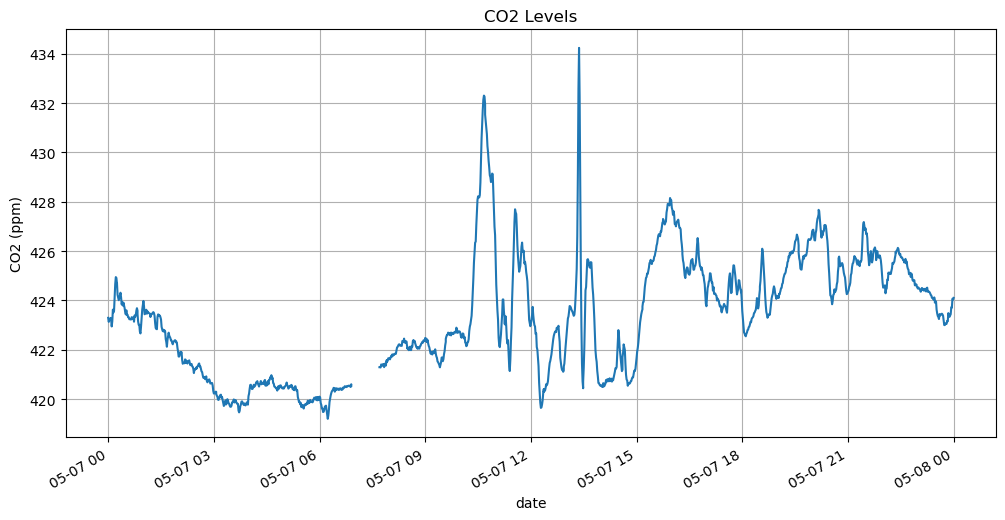

In [1169]:
plt.figure(figsize=(12, 6))  # Adjust size as needed
plt.title("CO2 Levels")
plt.ylabel("CO2 (ppm)")
week_co2.plot()
plt.grid()


# CH4

In [674]:
week_ch4

date
2024-05-07 00:00:00    1890.935658
2024-05-07 00:01:00    1890.428535
2024-05-07 00:02:00    1890.978517
2024-05-07 00:03:00    1891.504691
2024-05-07 00:04:00    1893.150219
                          ...     
2024-05-07 23:56:00    1909.491415
2024-05-07 23:57:00    1909.150945
2024-05-07 23:58:00    1909.409637
2024-05-07 23:59:00    1909.266338
2024-05-08 00:00:00    1910.969769
Name: CH4, Length: 1476, dtype: float64

In [676]:
week_ch4[week_ch4==week_ch4.max()]

date
2024-05-07 13:22:00    2123.325586
Name: CH4, dtype: float64

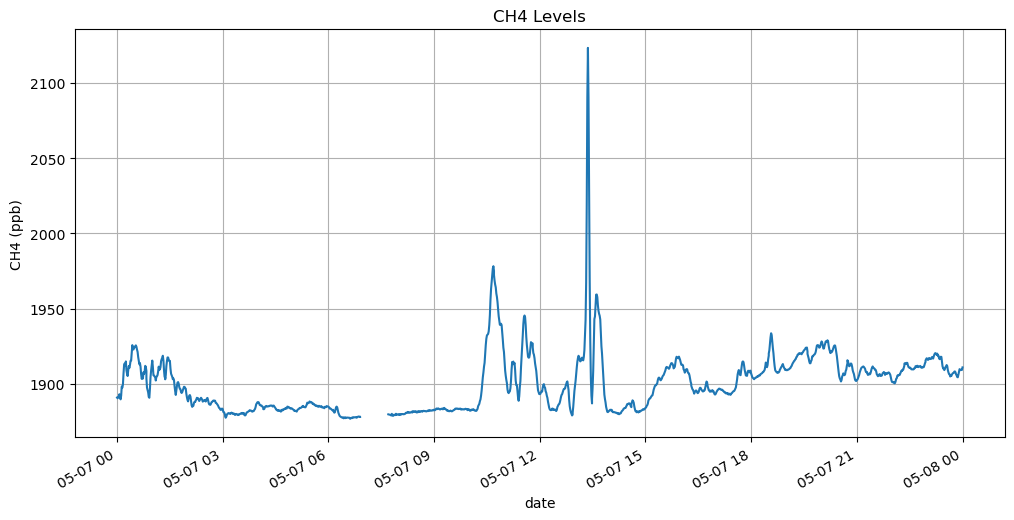

In [997]:
plt.figure(figsize=(12, 6))  # Adjust size as needed
plt.title("CH4 Levels")
plt.ylabel("CH4 (ppb)")
week_ch4.plot()
plt.grid()

# CO

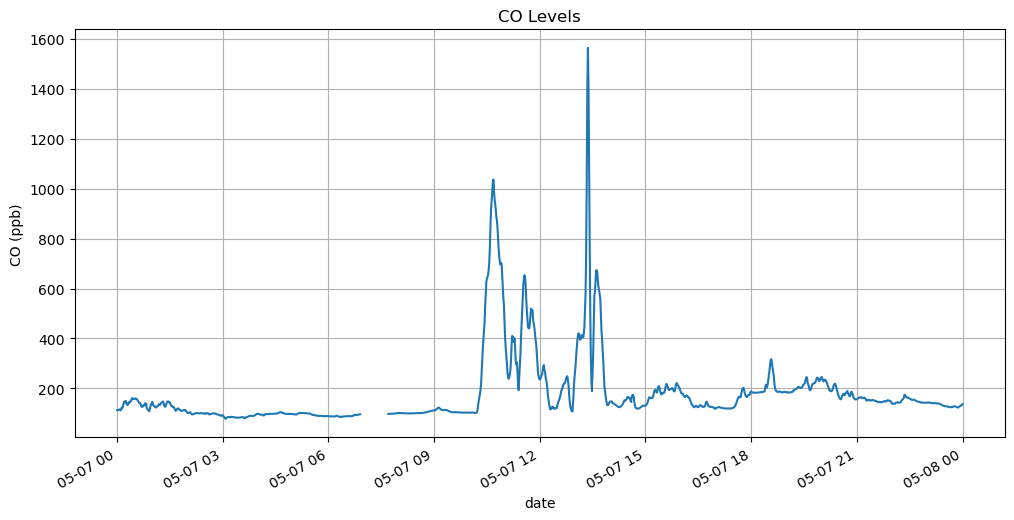

In [1001]:
plt.figure(figsize=(12, 6))  # Adjust size as needed
plt.title("CO Levels")
plt.ylabel("CO (ppb)")
week_co.plot()
plt.grid()

In [685]:
df['5min_Rolling_Mean_CO2'] = df['CO2_T'].rolling(window=5, min_periods=1).mean()

In [687]:
co2_rolling = df['5min_Rolling_Mean_CO2']
co2_roll = co2_rolling[slice(start,end)]

In [689]:
co2_roll

date
2024-05-07 00:00:00    423.269411
2024-05-07 00:01:00    423.230983
2024-05-07 00:02:00    423.235922
2024-05-07 00:03:00    423.226542
2024-05-07 00:04:00    423.226032
                          ...    
2024-05-07 23:56:00    423.449545
2024-05-07 23:57:00    423.516917
2024-05-07 23:58:00    423.663487
2024-05-07 23:59:00    423.792920
2024-05-08 00:00:00    423.925119
Name: 5min_Rolling_Mean_CO2, Length: 1476, dtype: float64

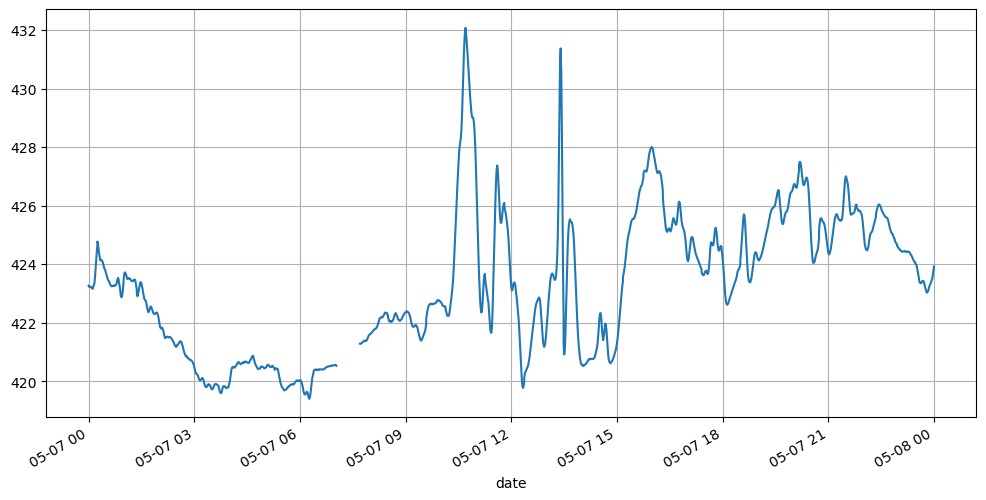

In [1003]:
plt.figure(figsize=(12, 6))  # Adjust size as needed

co2_roll.plot()
plt.grid()

In [693]:
df['5min_Rolling_Mean_CH4'] = df['CH4'].rolling(window=5, min_periods=1).mean()
ch4_rolling = df['5min_Rolling_Mean_CH4']
ch4_roll = ch4_rolling[slice(start,end)]

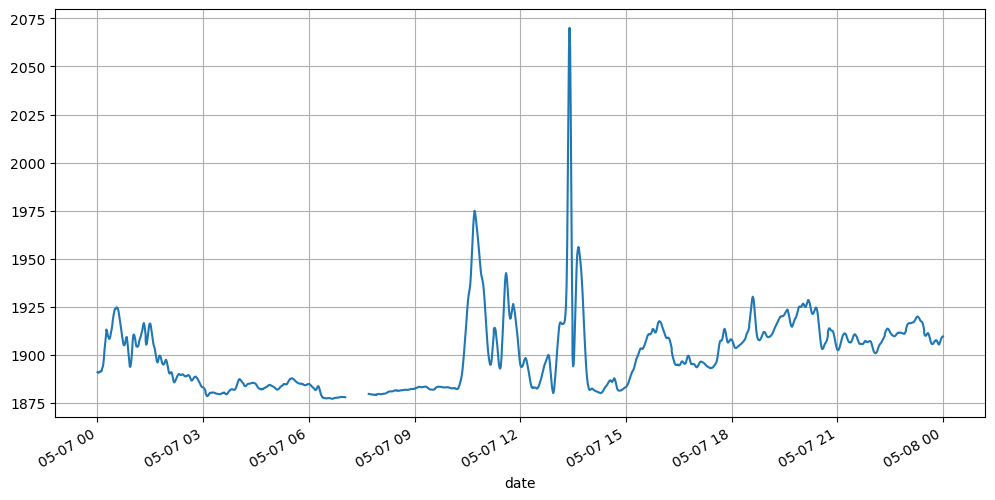

In [1005]:
plt.figure(figsize=(12, 6))  # Adjust size as needed

ch4_roll.plot()
plt.grid()

In [697]:
df['5min_Rolling_Mean_CO'] = df['CO'].rolling(window=5, min_periods=1).mean()
co_rolling = df['5min_Rolling_Mean_CO']
co_roll = co_rolling[slice(start,end)]

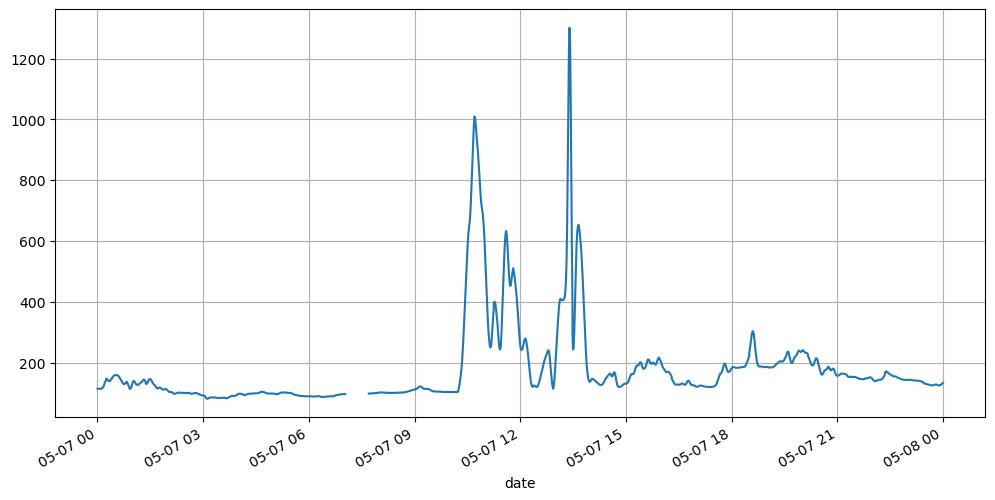

In [699]:
plt.figure(figsize=(12, 6))  # Adjust size as needed

co_roll.plot()
plt.grid()

In [701]:
dp = pd.read_csv("Picarro_1_CO_2024_05_06_till_2024_05_09.csv", index_col=0)
dp

,Datetime,C,C.1
date,,,
2024-05-06 00:00:30,2024-05-06 00:00:30,68.145,336.382
2024-05-06 00:01:30,2024-05-06 00:01:30,67.816,336.438
2024-05-06 00:02:30,2024-05-06 00:02:30,67.759,336.410
2024-05-06 00:03:30,2024-05-06 00:03:30,67.988,336.424
2024-05-06 00:04:30,2024-05-06 00:04:30,67.852,336.420
...,...,...,...
2024-05-09 23:55:30,2024-05-09 23:55:30,84.859,336.580
2024-05-09 23:56:30,2024-05-09 23:56:30,85.625,336.566
2024-05-09 23:57:30,2024-05-09 23:57:30,85.586,336.634


In [703]:
co_series_pic = dp["C"]

In [705]:
dp['5min_Rolling_Mean_CO'] = dp['C'].rolling(window=5, min_periods=1).mean()
co_rolling_pic = dp['5min_Rolling_Mean_CO']
co_roll_pic = co_rolling_pic[slice("2024-05-07","2024-05-08")]

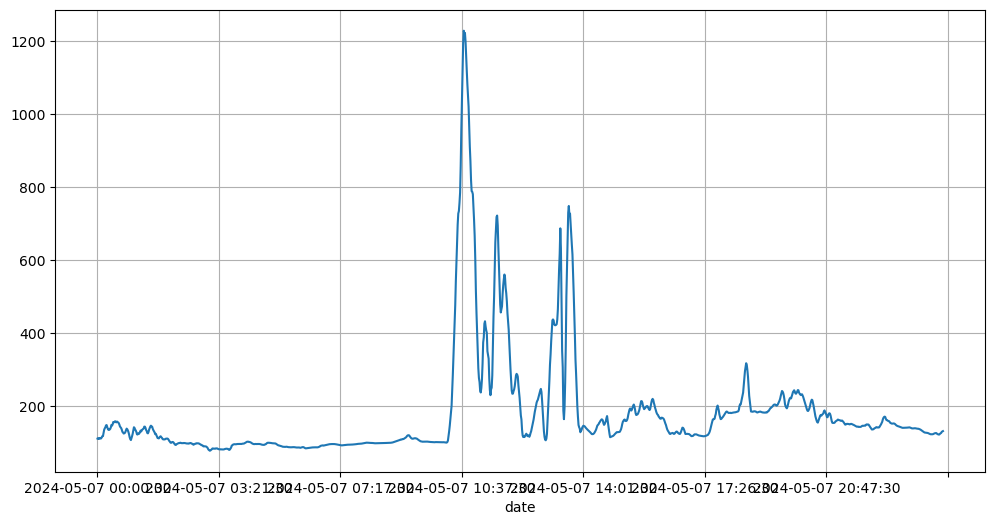

In [710]:
plt.figure(figsize=(12, 6))  # Adjust size as needed

co_roll_pic.plot()
plt.grid()

In [931]:
#co_roll[co_roll==co_roll.max()]

# FTS vs PICARRO

In [765]:
kcg_fts_file = "KCG-FTS-May-2024.csv"
kcg_fts_df = pd.read_csv(kcg_fts_file, parse_dates=['DateTXT'], dayfirst=True)
kcg_fts_df.set_index('DateTXT', inplace=True)
kcg_fts_df.index = pd.to_datetime(kcg_fts_df.index).tz_localize('Australia/Sydney')  # Set AEST timezone
kcg_fts_df.index = kcg_fts_df.index.tz_convert('UTC')
kcg_fts_filtered = kcg_fts_df.loc["2024-05-07"]
kcg_fts_time = kcg_fts_filtered.index
fts_co_roll = kcg_fts_filtered['CO'].rolling(window=5, min_periods=1).mean()


####################################################### PICARRO ##################################################

picarro_file = "Picarro_1_CO_2024_05_06_till_2024_05_09.csv"
picarro_df = pd.read_csv(picarro_file, parse_dates=['Datetime'])
picarro_df.set_index('Datetime', inplace=True)
picarro_df.index = pd.to_datetime(picarro_df.index)  # Picarro is already in UTC
picarro_filtered = picarro_df.loc["2024-05-07"]
picarro_time = picarro_filtered.index
picarro_c0_roll = picarro_filtered['C'].rolling(window=5, min_periods=1).mean()


/var/folders/bq/p_4m7ltj17d8pvp53bk4z83w0000gn/T/ipykernel_20095/834299404.py:2: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  kcg_fts_df = pd.read_csv(kcg_fts_file, parse_dates=['DateTXT'], dayfirst=True)


In [771]:
#picarro_filtered

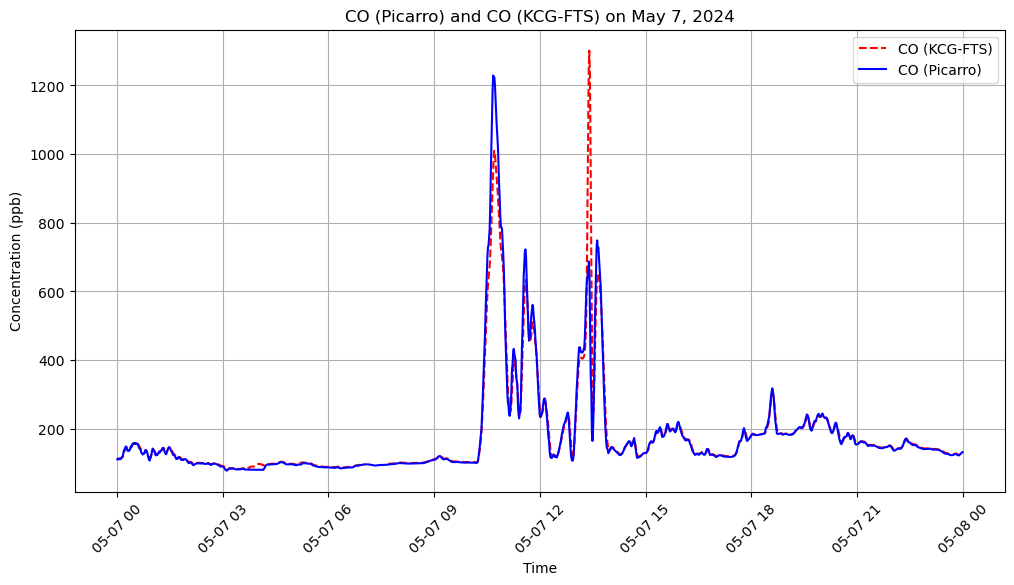

In [1129]:
plt.figure(figsize=(12, 6))

plt.plot(kcg_fts_time, fts_co_roll, label='CO (KCG-FTS)', color='red', linestyle='--')
plt.plot(picarro_time, co_roll_pic, label='CO (Picarro)', color='blue', linestyle='-')

plt.xlabel("Time")
plt.ylabel("Concentration (ppb)")
plt.title("CO (Picarro) and CO (KCG-FTS) on May 7, 2024")
plt.legend()
plt.xticks(rotation=45)
plt.grid()

plt.show()

# CO vs CO2

In [873]:
co2_roll.index = pd.to_datetime(co2_roll.index, unit='s').astype('datetime64[ms]')

In [927]:
roll_df = pd.DataFrame({"co2":co2_roll.values,
              "co":co_roll.values,
                "ch4": ch4_roll.values},
             index=co2_roll.index)

In [929]:
roll_df["hour"] = roll_df.index.hour
roll_df["minute"] = roll_df.index.minute
roll_df

,co2,co,ch4,hour,minute
date,,,,,
2024-05-07 00:00:00,423.269411,113.912531,1891.050930,0,0
2024-05-07 00:01:00,423.230983,113.298558,1890.756236,0,1
2024-05-07 00:02:00,423.235922,113.310186,1890.823772,0,2
2024-05-07 00:03:00,423.226542,113.309499,1890.941994,0,3
2024-05-07 00:04:00,423.226032,113.663212,1891.399524,0,4
...,...,...,...,...,...
2024-05-07 23:56:00,423.449545,126.325464,1907.542270,23,56
2024-05-07 23:57:00,423.516917,127.638525,1908.496224,23,57
2024-05-07 23:58:00,423.663487,129.533631,1909.159034,23,58


In [1017]:
roll_df["time_of_day"] = roll_df.index.strftime("%H%M").astype(int)/100
roll_df

,co2,co,ch4,hour,minute,time_of_day
date,,,,,,
2024-05-07 00:00:00,423.269411,113.912531,1891.050930,0,0,0.00
2024-05-07 00:01:00,423.230983,113.298558,1890.756236,0,1,0.01
2024-05-07 00:02:00,423.235922,113.310186,1890.823772,0,2,0.02
2024-05-07 00:03:00,423.226542,113.309499,1890.941994,0,3,0.03
2024-05-07 00:04:00,423.226032,113.663212,1891.399524,0,4,0.04
...,...,...,...,...,...,...
2024-05-07 23:56:00,423.449545,126.325464,1907.542270,23,56,23.56
2024-05-07 23:57:00,423.516917,127.638525,1908.496224,23,57,23.57
2024-05-07 23:58:00,423.663487,129.533631,1909.159034,23,58,23.58


In [1097]:
subset = roll_df[slice(nstart,nend)]

In [1099]:
nstart = dt.datetime(2024,5,7,9,0,0)
nend =  dt.datetime(2024,5,7,15,0,0)
peak_co2 = co2_roll[slice(nstart,nend)]
peak_co = co_roll[slice(nstart,nend)]
peak_ch4 = ch4_roll[slice(nstart,nend)]

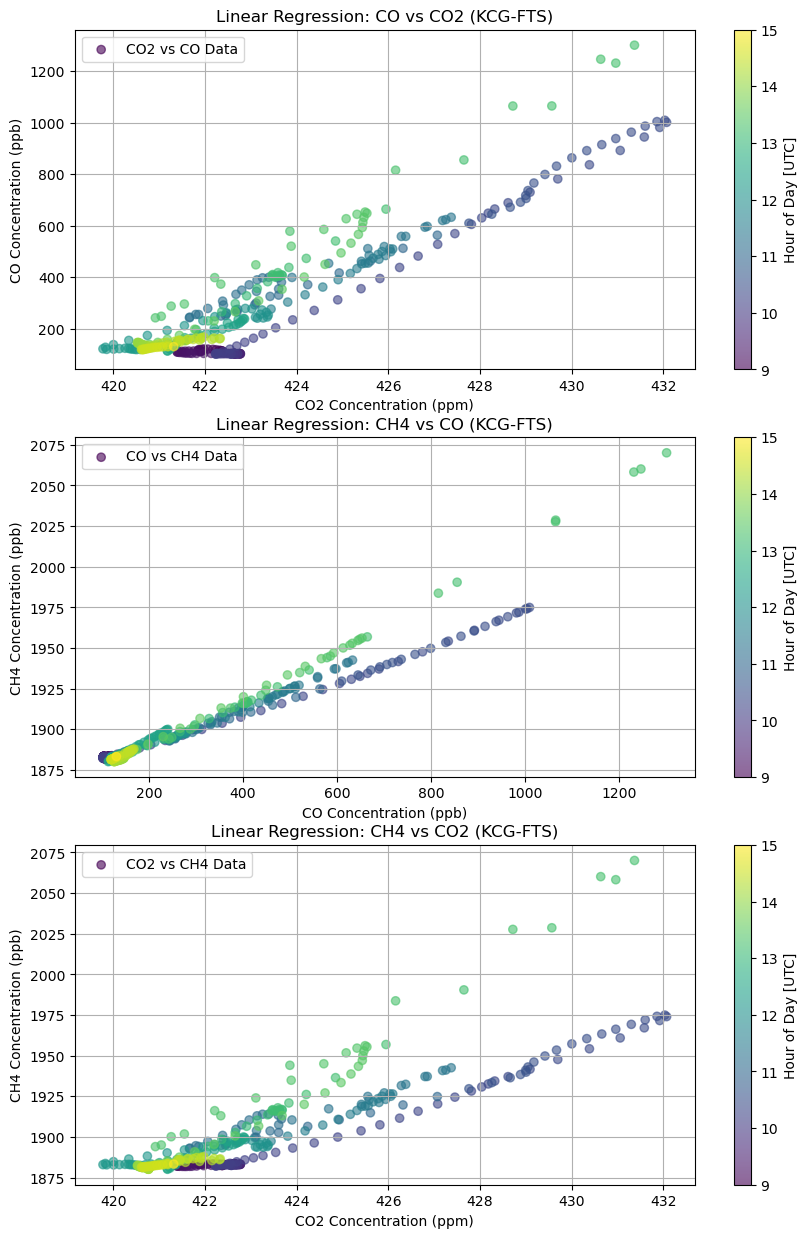

In [1189]:
fig, axes = plt.subplots(3, 1, figsize=(10, 15), sharex=False)

s1 = axes[0].scatter(subset.co2, subset.co, c=subset.time_of_day, label="CO2 vs CO Data", alpha=0.6)
plt.colorbar(s1, ax=axes[0], label='Hour of Day [UTC]')
axes[0].set_xlabel("CO2 Concentration (ppm)")
axes[0].set_ylabel("CO Concentration (ppb)")
axes[0].set_title("Linear Regression: CO vs CO2 (KCG-FTS)")
axes[0].legend()
axes[0].grid()

s2 = axes[1].scatter(subset.co, subset.ch4, c=subset.time_of_day, label="CO vs CH4 Data", alpha=0.6)
plt.colorbar(s2, ax=axes[1], label='Hour of Day [UTC]')
axes[1].set_xlabel("CO Concentration (ppb)")
axes[1].set_ylabel("CH4 Concentration (ppb)")
axes[1].set_title("Linear Regression: CH4 vs CO (KCG-FTS)")
axes[1].legend()
axes[1].grid()

s3 = axes[2].scatter(subset.co2, subset.ch4, c=subset.time_of_day, label="CO2 vs CH4 Data", alpha=0.6)
plt.colorbar(s3, ax=axes[2], label='Hour of Day [UTC]')
axes[2].set_xlabel("CO2 Concentration (ppm)")
axes[2].set_ylabel("CH4 Concentration (ppb)")
axes[2].set_title("Linear Regression: CH4 vs CO2 (KCG-FTS)")
axes[2].legend()
axes[2].grid()

In [1191]:
fig.savefig("/Users/prashasti/OneDrive - The University of Melbourne/ARM training/scatterplots.png",  bbox_inches='tight')  # Save as PNG

# for the whole day 7th may

In [1056]:
'''# Create subplots
fig, axes = plt.subplots(2, 1, figsize=(8, 10), sharex=False)

# Perform linear regression for CO vs CO2
#slope_co2, intercept_co2 = np.polyfit(co2_roll, co_roll, 1)
#co_predicted_co2 = slope_co2 * co2_roll + intercept_co2

# Perform linear regression for CO vs CH4
#slope_ch4, intercept_ch4 = np.polyfit(ch4_roll, co_roll, 1)
#co_predicted_ch4 = slope_ch4 * ch4_roll + intercept_ch4

# First subplot: CO vs CO2
s = axes[0].scatter(co2_roll, co_roll, c=roll_df.time_of_day,label="CO vs CO2 Data", alpha=0.6)
plt.colorbar(s, label='Hour of Day [UTC]')
#axes[0].plot(co2_roll, co_predicted_co2, label=f"Linear Fit (y = {slope_co2:.4f}x + {intercept_co2:.4f})", color="black", linestyle="--")
axes[0].set_xlabel("CO2 Concentration")
axes[0].set_ylabel("CO Concentration")
axes[0].set_title("Linear Regression: CO vs CO₂ (KCG-FTS)")
axes[0].legend()
axes[0].grid()

# Second subplot: CO vs CH4
axes[1].scatter(ch4_roll, co_roll, c=roll_df.time_of_day, label="CO vs CH4 Data", alpha=0.6)
plt.colorbar(s, ax=axes[1], label='Hour of Day [UTC]')
#axes[1].plot(ch4_roll, co_predicted_ch4, label=f"Linear Fit (y = {slope_ch4:.4f}x + {intercept_ch4:.4f})", color="black", linestyle="--")
axes[1].set_xlabel("CH4 Concentration")
axes[1].set_ylabel("CO Concentration")
axes[1].set_title("Linear Regression: CO vs CH₄ (KCG-FTS)")
axes[1].legend()
axes[1].grid()

# Adjust layout and show plot
plt.tight_layout()
plt.show()'''

'# Create subplots\nfig, axes = plt.subplots(2, 1, figsize=(8, 10), sharex=False)\n\n# Perform linear regression for CO vs CO2\n#slope_co2, intercept_co2 = np.polyfit(co2_roll, co_roll, 1)\n#co_predicted_co2 = slope_co2 * co2_roll + intercept_co2\n\n# Perform linear regression for CO vs CH4\n#slope_ch4, intercept_ch4 = np.polyfit(ch4_roll, co_roll, 1)\n#co_predicted_ch4 = slope_ch4 * ch4_roll + intercept_ch4\n\n# First subplot: CO vs CO2\ns = axes[0].scatter(co2_roll, co_roll, c=roll_df.time_of_day,label="CO vs CO2 Data", alpha=0.6)\nplt.colorbar(s, label=\'Hour of Day [UTC]\')\n#axes[0].plot(co2_roll, co_predicted_co2, label=f"Linear Fit (y = {slope_co2:.4f}x + {intercept_co2:.4f})", color="black", linestyle="--")\naxes[0].set_xlabel("CO2 Concentration")\naxes[0].set_ylabel("CO Concentration")\naxes[0].set_title("Linear Regression: CO vs CO₂ (KCG-FTS)")\naxes[0].legend()\naxes[0].grid()\n\n# Second subplot: CO vs CH4\naxes[1].scatter(ch4_roll, co_roll, c=roll_df.time_of_day, label="CO

# time slices

In [1109]:
subset1 = roll_df[slice("2024-05-07 09:00:00","2024-05-07 10:59:00")]
subset2 = roll_df[slice("2024-05-07 11:00:00","2024-05-07 12:59:00")]
subset3 = roll_df[slice("2024-05-07 13:00:00","2024-05-07 15:00:00")]



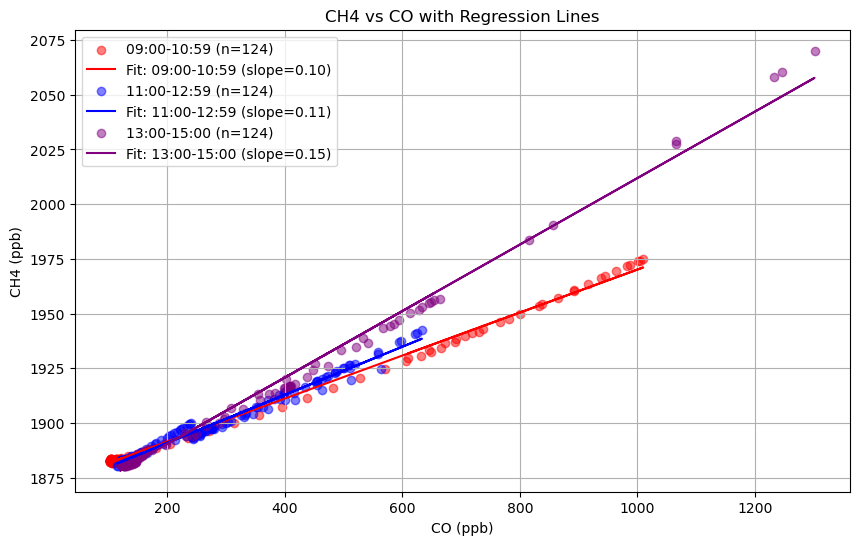

In [1199]:
def plot_regression(subset, label, color):
    # Extract CO and CH4 values
    x = subset['co']
    y = subset['ch4']
    
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    
    # Plot scatter plot
    plt.scatter(x, y, label=f"{label} (n={len(x)})", color=color, alpha=0.5)
    
    # Plot the regression line
    plt.plot(x, slope * x + intercept, color=color, linestyle='-', label=f"Fit: {label} (slope={slope:.2f})")
    
    return slope  # Return the slope for comparison

# Plot the data
fig1 = plt.figure(figsize=(10, 6))

slope1 = plot_regression(subset1, "09:00-10:59", 'red')
slope2 = plot_regression(subset2, "11:00-12:59", 'blue')
slope3 = plot_regression(subset3, "13:00-15:00", 'purple')

# Set labels and title
plt.xlabel("CO (ppb)")
plt.ylabel("CH4 (ppb)")
plt.title("CH4 vs CO with Regression Lines")
plt.legend(loc='upper left')
plt.grid()
# Show the plot
plt.show()

In [1201]:
fig1.savefig("/Users/prashasti/OneDrive - The University of Melbourne/ARM training/ch4vscoslope.png",  bbox_inches='tight')  # Save as PNG

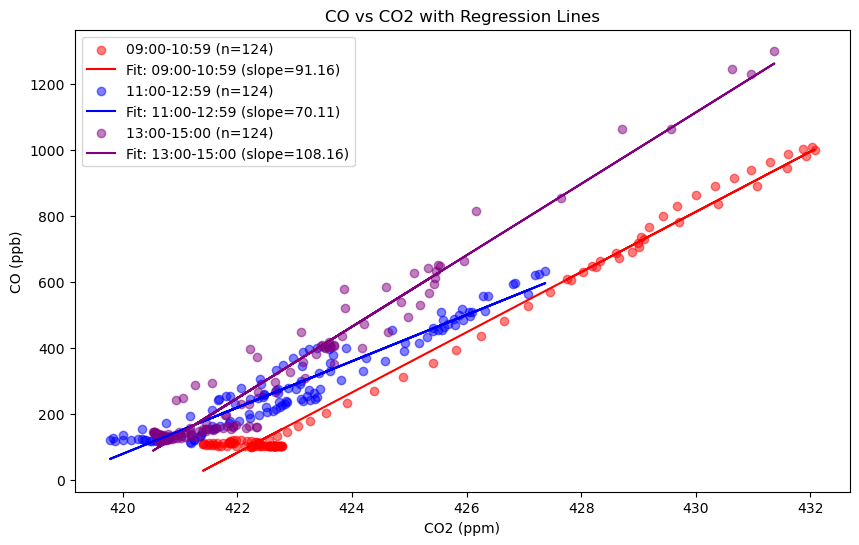

In [1203]:
def plot_regression(subset, label, color):
    # Extract CO and CH4 values
    x = subset['co2']
    y = subset['co']
    
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    
    # Plot scatter plot
    plt.scatter(x, y, label=f"{label} (n={len(x)})", color=color, alpha=0.5)
    
    # Plot the regression line
    plt.plot(x, slope * x + intercept, color=color, linestyle='-', label=f"Fit: {label} (slope={slope:.2f})")
    
    return slope  # Return the slope for comparison

# Plot the data
fig2 = plt.figure(figsize=(10, 6))

slope1 = plot_regression(subset1, "09:00-10:59", 'red')
slope2 = plot_regression(subset2, "11:00-12:59", 'blue')
slope3 = plot_regression(subset3, "13:00-15:00", 'purple')

# Set labels and title
plt.xlabel("CO2 (ppm)")
plt.ylabel("CO (ppb)")
plt.title("CO vs CO2 with Regression Lines")
plt.legend(loc='upper left')

# Show the plot
plt.show()

In [1205]:
fig2.savefig("/Users/prashasti/OneDrive - The University of Melbourne/ARM training/covsco2slope.png",  bbox_inches='tight')  # Save as PNG

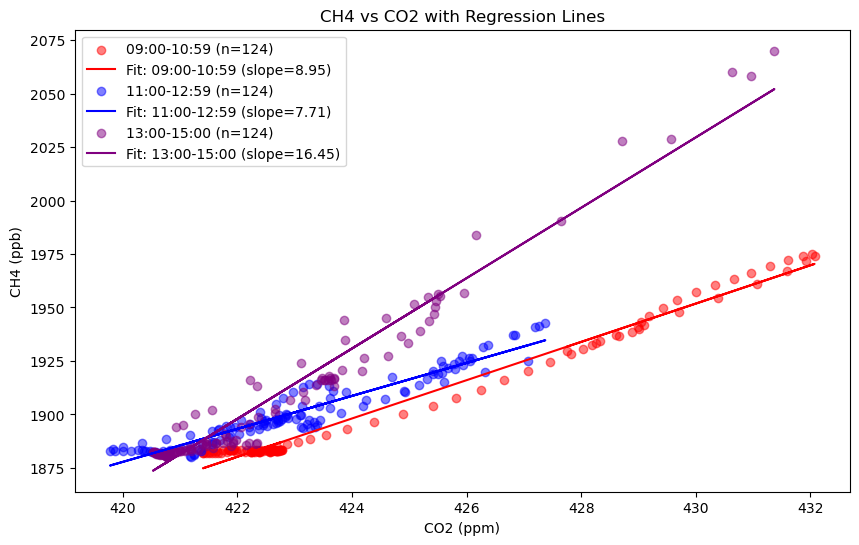

In [1207]:
def plot_regression(subset, label, color):
    # Extract CO and CH4 values
    x = subset['co2']
    y = subset['ch4']
    
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    
    # Plot scatter plot
    plt.scatter(x, y, label=f"{label} (n={len(x)})", color=color, alpha=0.5)
    
    # Plot the regression line
    plt.plot(x, slope * x + intercept, color=color, linestyle='-', label=f"Fit: {label} (slope={slope:.2f})")
    
    return slope  # Return the slope for comparison

# Plot the data
fig3 = plt.figure(figsize=(10, 6))

slope1 = plot_regression(subset1, "09:00-10:59", 'red')
slope2 = plot_regression(subset2, "11:00-12:59", 'blue')
slope3 = plot_regression(subset3, "13:00-15:00", 'purple')

# Set labels and title
plt.xlabel("CO2 (ppm)")
plt.ylabel("CH4 (ppb)")
plt.title("CH4 vs CO2 with Regression Lines")
plt.legend(loc='upper left')

# Show the plot
plt.show()

In [1211]:
fig3.savefig("/Users/prashasti/OneDrive - The University of Melbourne/ARM training/ch4vsco2slope.png",  bbox_inches='tight')  # Save as PNG